In [1]:
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

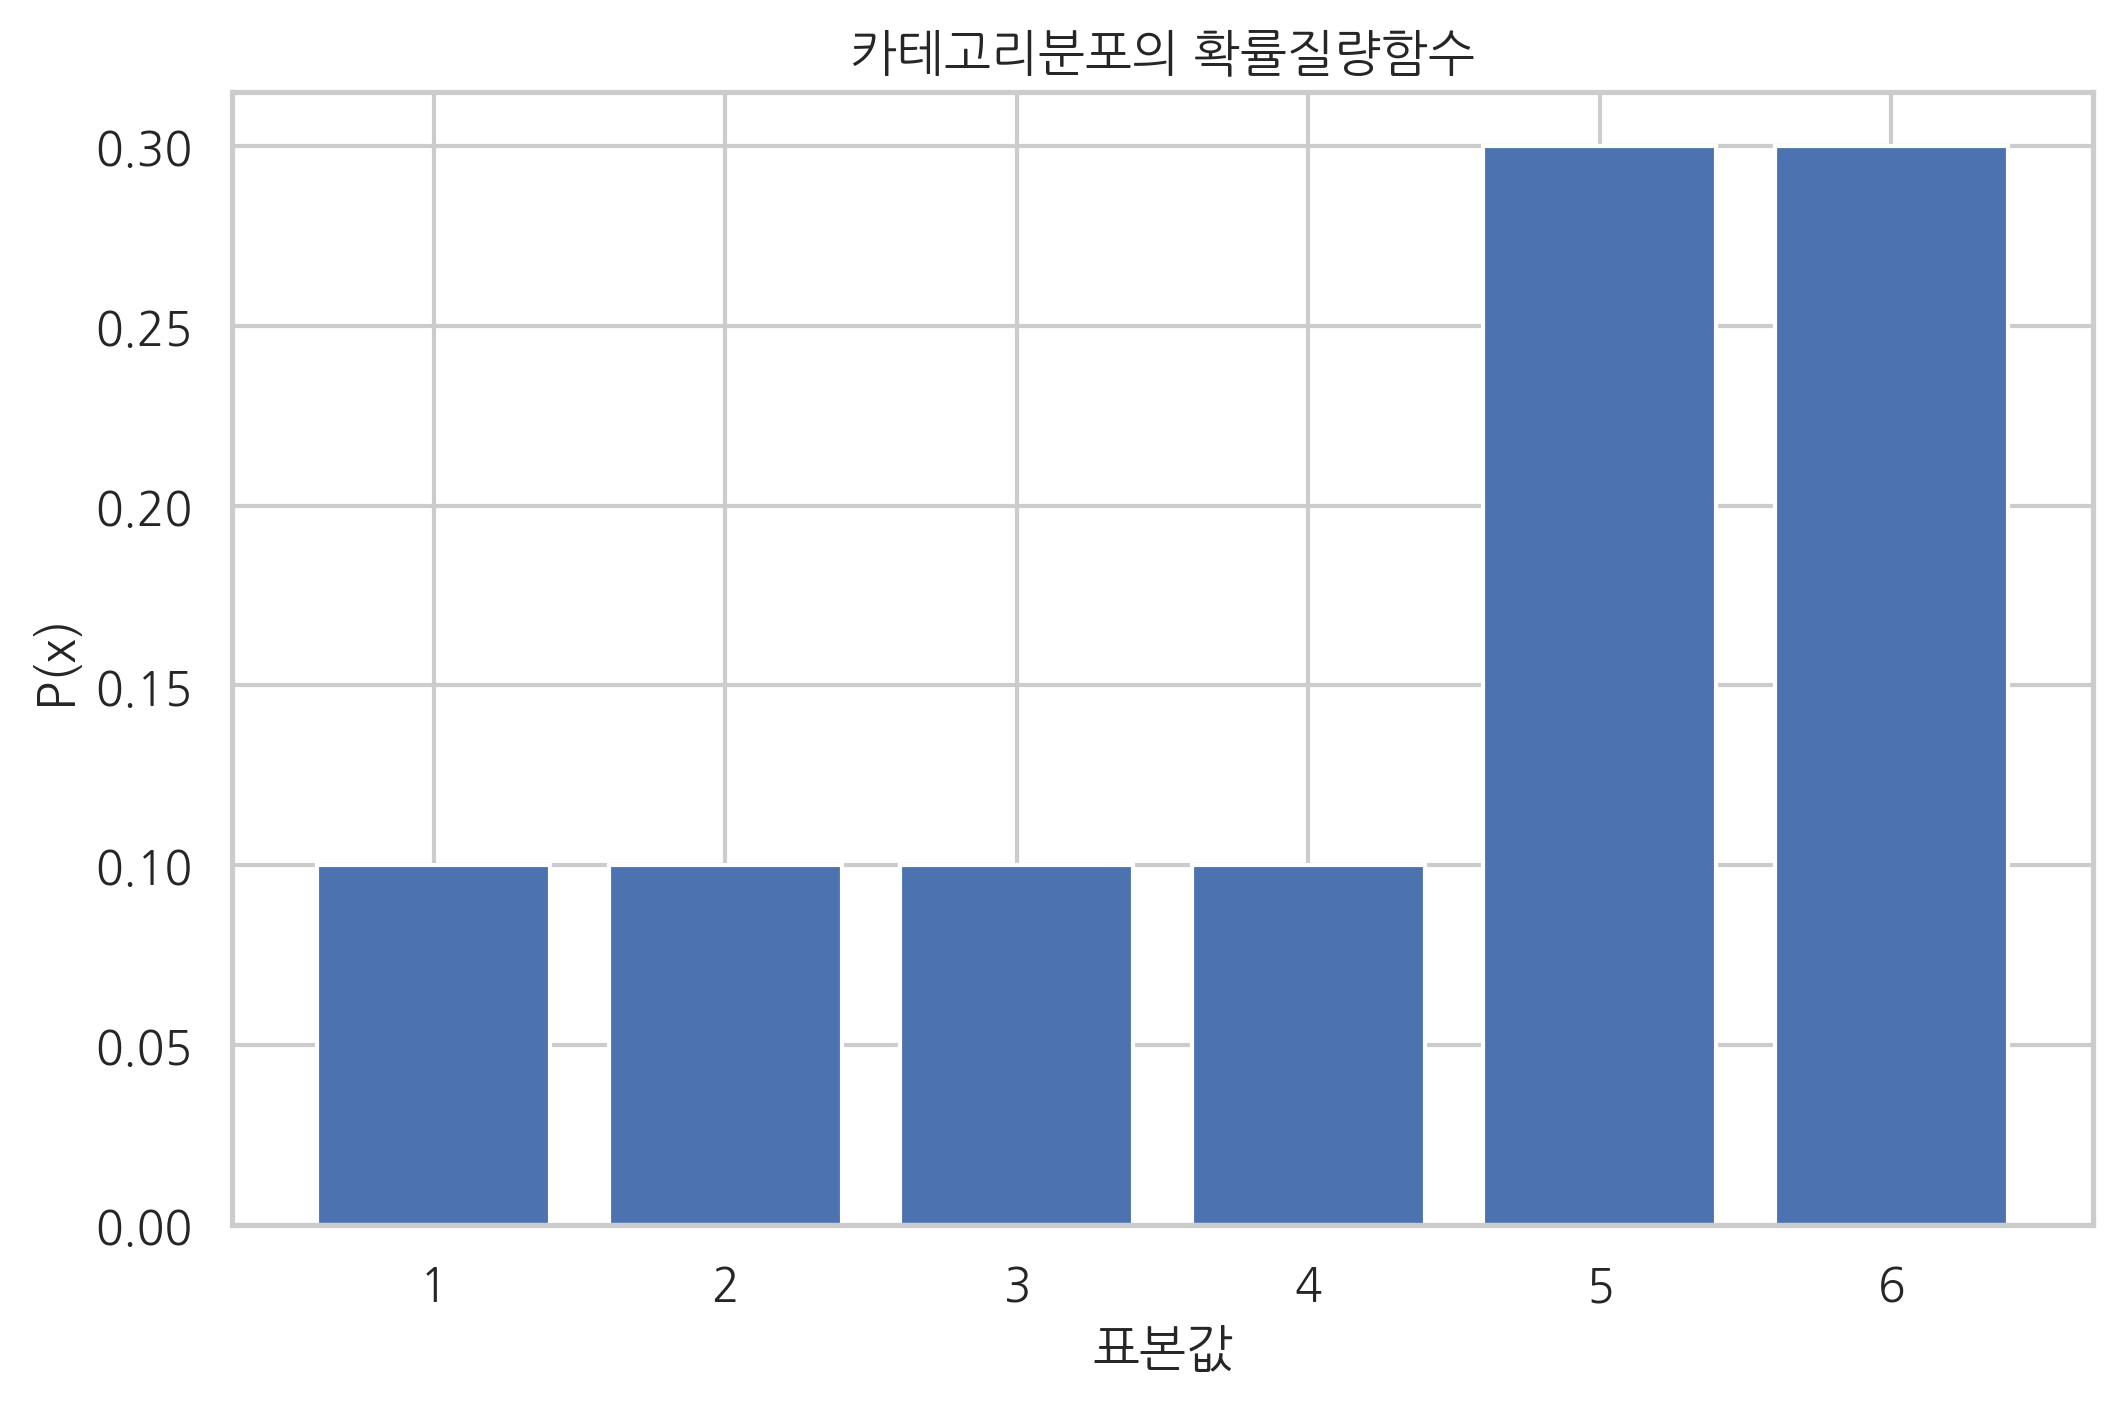

In [2]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.xlabel("표본값")
plt.title("카테고리분포의 확률질량함수")
plt.show()

In [3]:
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

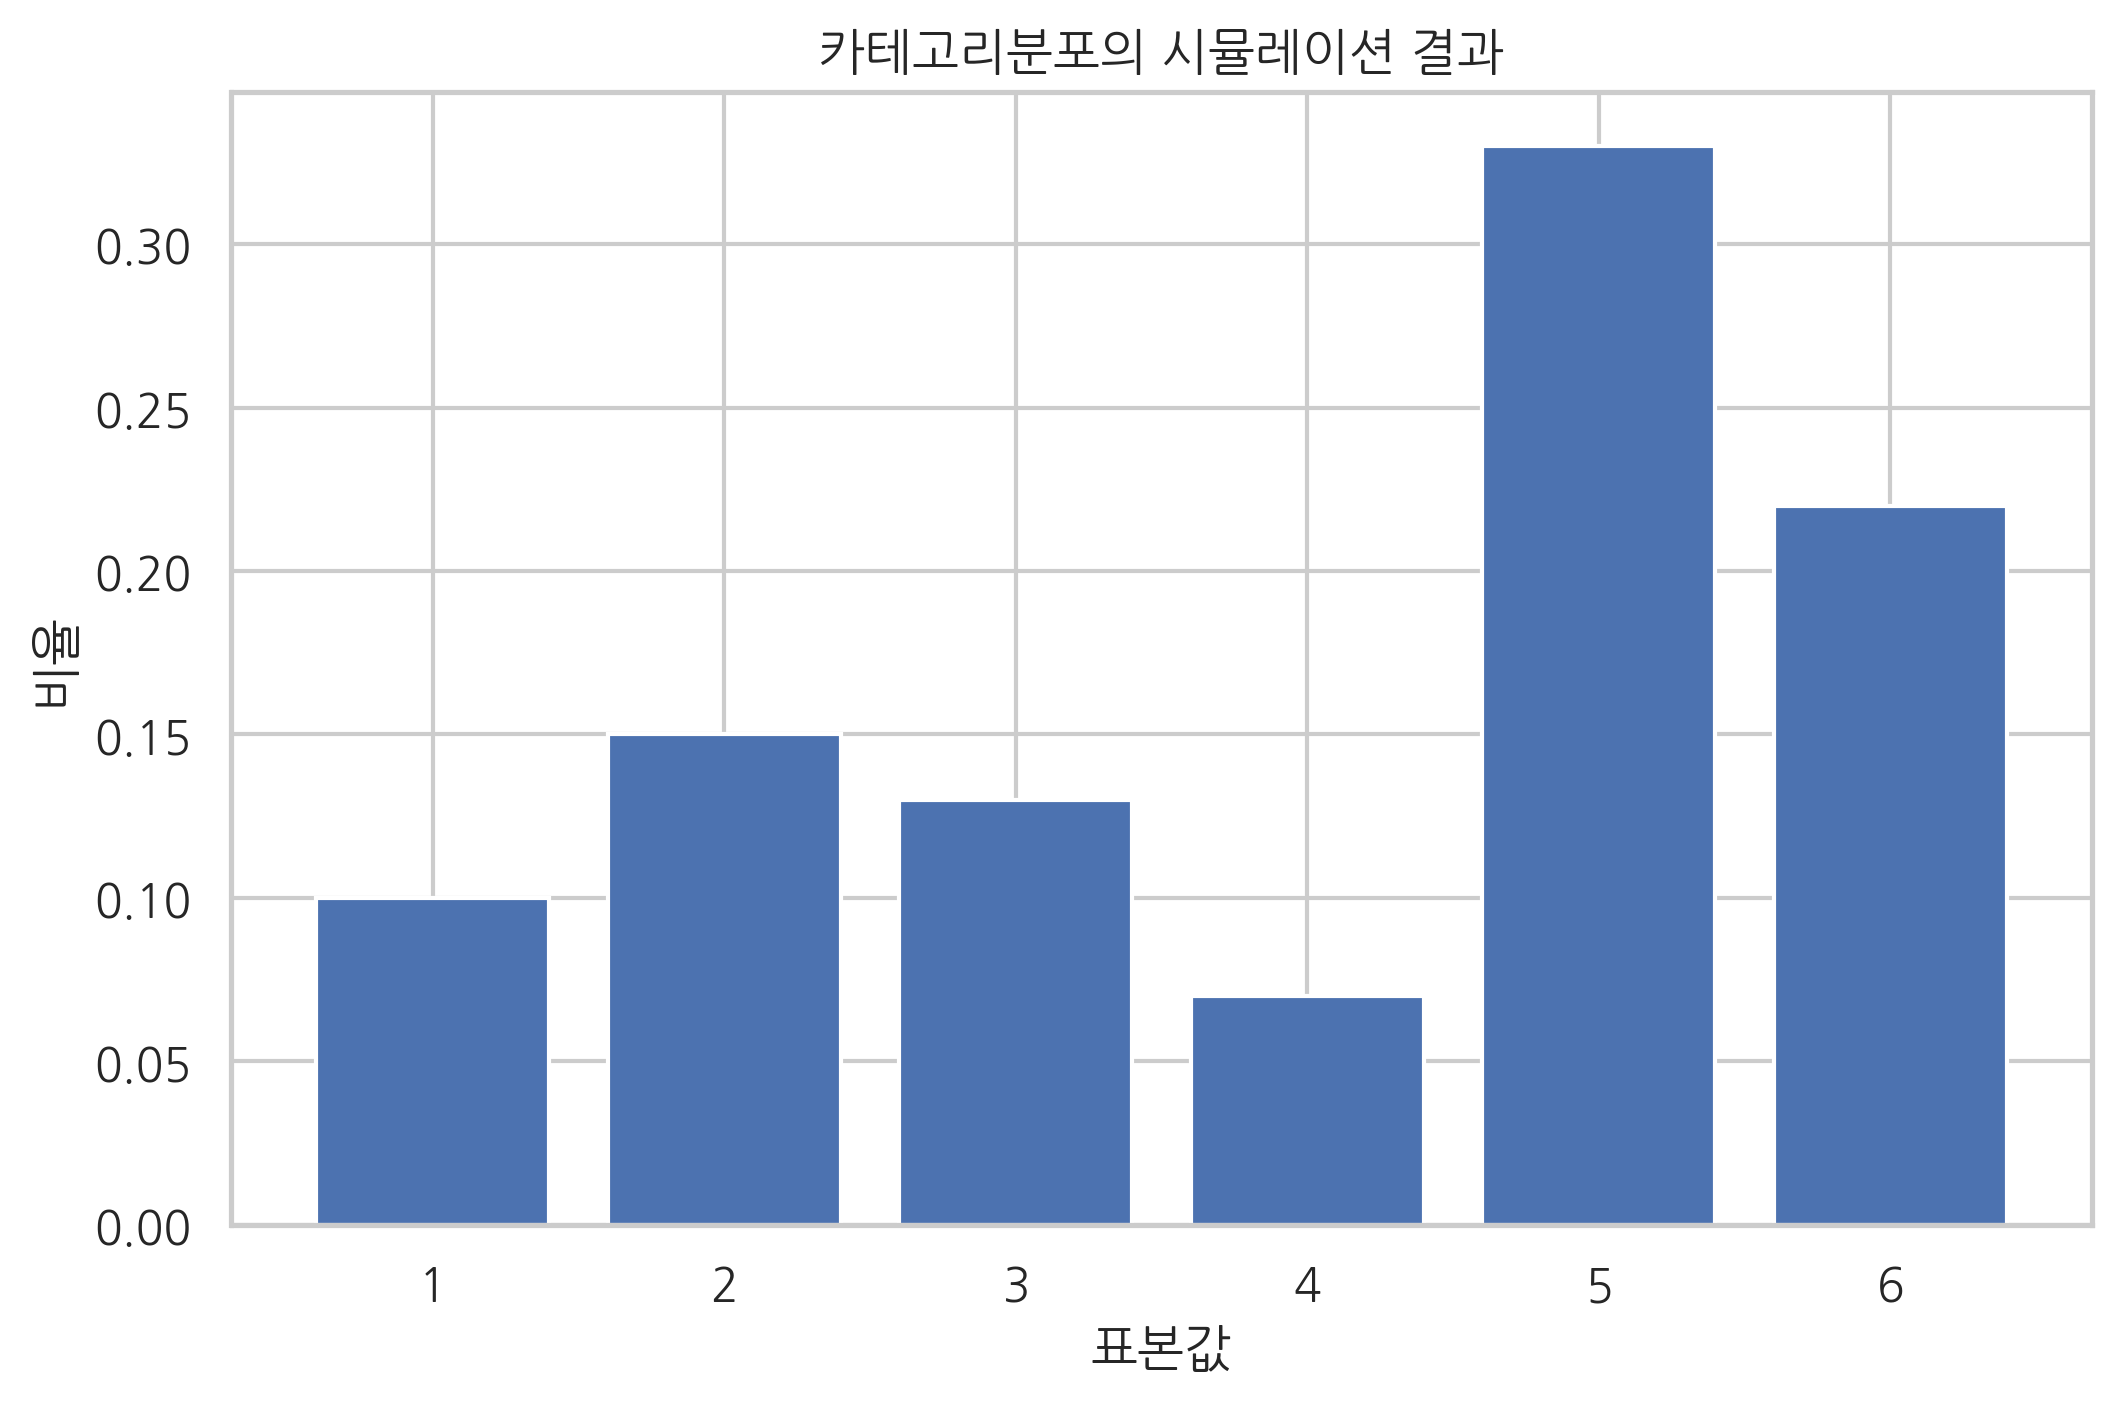

In [4]:
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.show()

In [5]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                  index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,이론,0.10
1,1,시뮬레이션,0.10
2,2,이론,0.10
3,2,시뮬레이션,0.15
4,3,이론,0.10
5,3,시뮬레이션,0.13
6,4,이론,0.10
7,4,시뮬레이션,0.07
8,5,이론,0.30
9,5,시뮬레이션,0.33


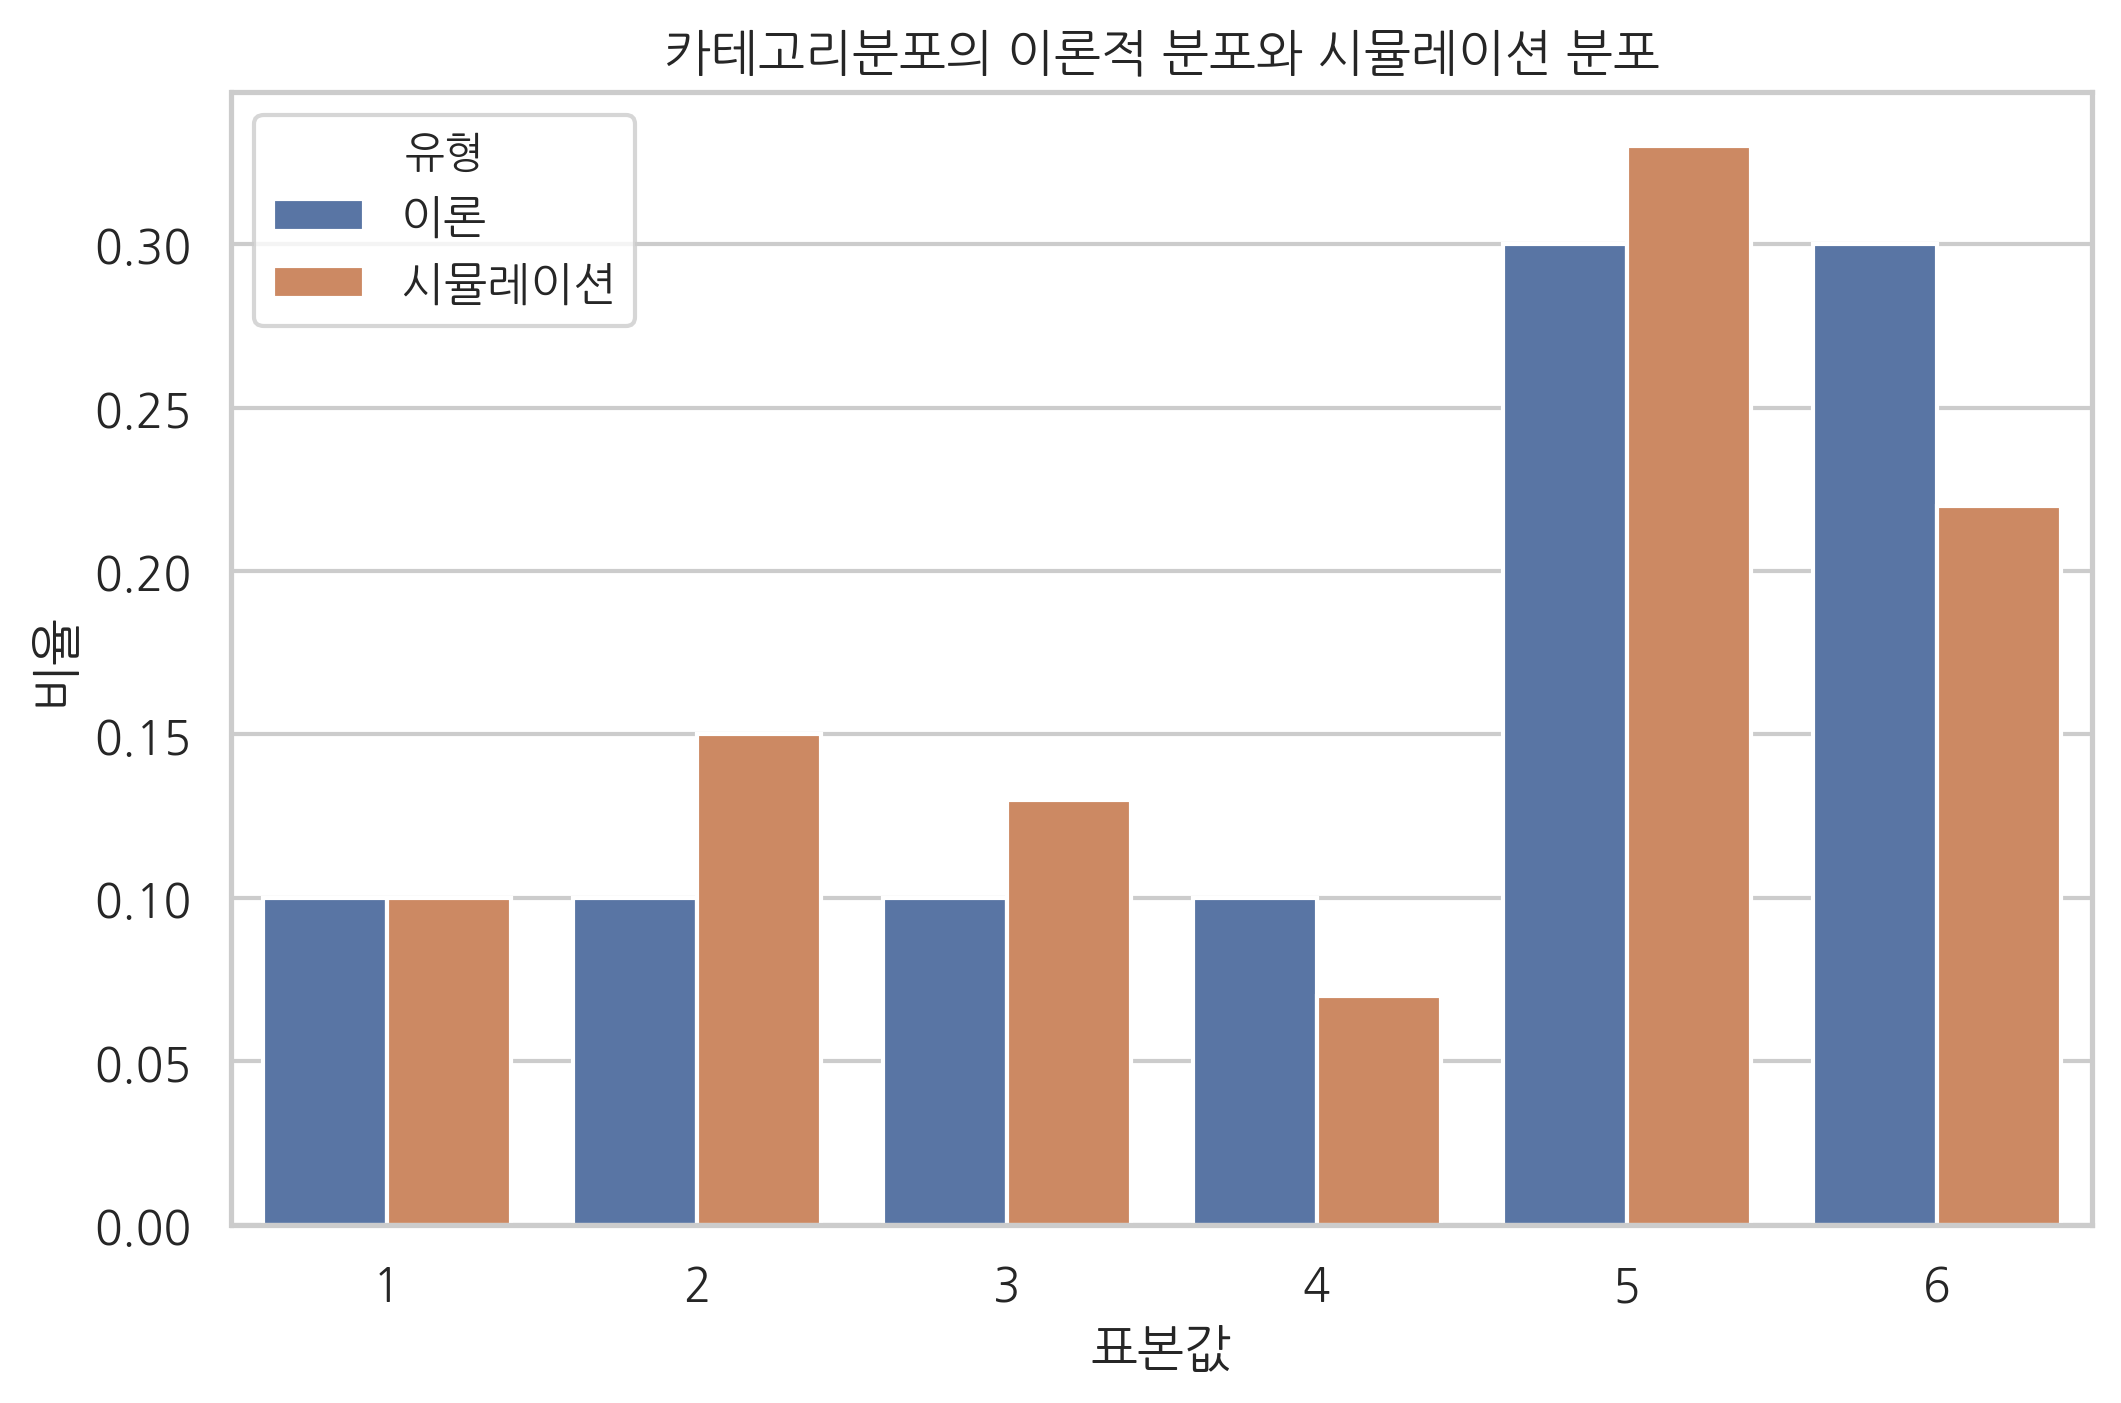

In [6]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("카테고리분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

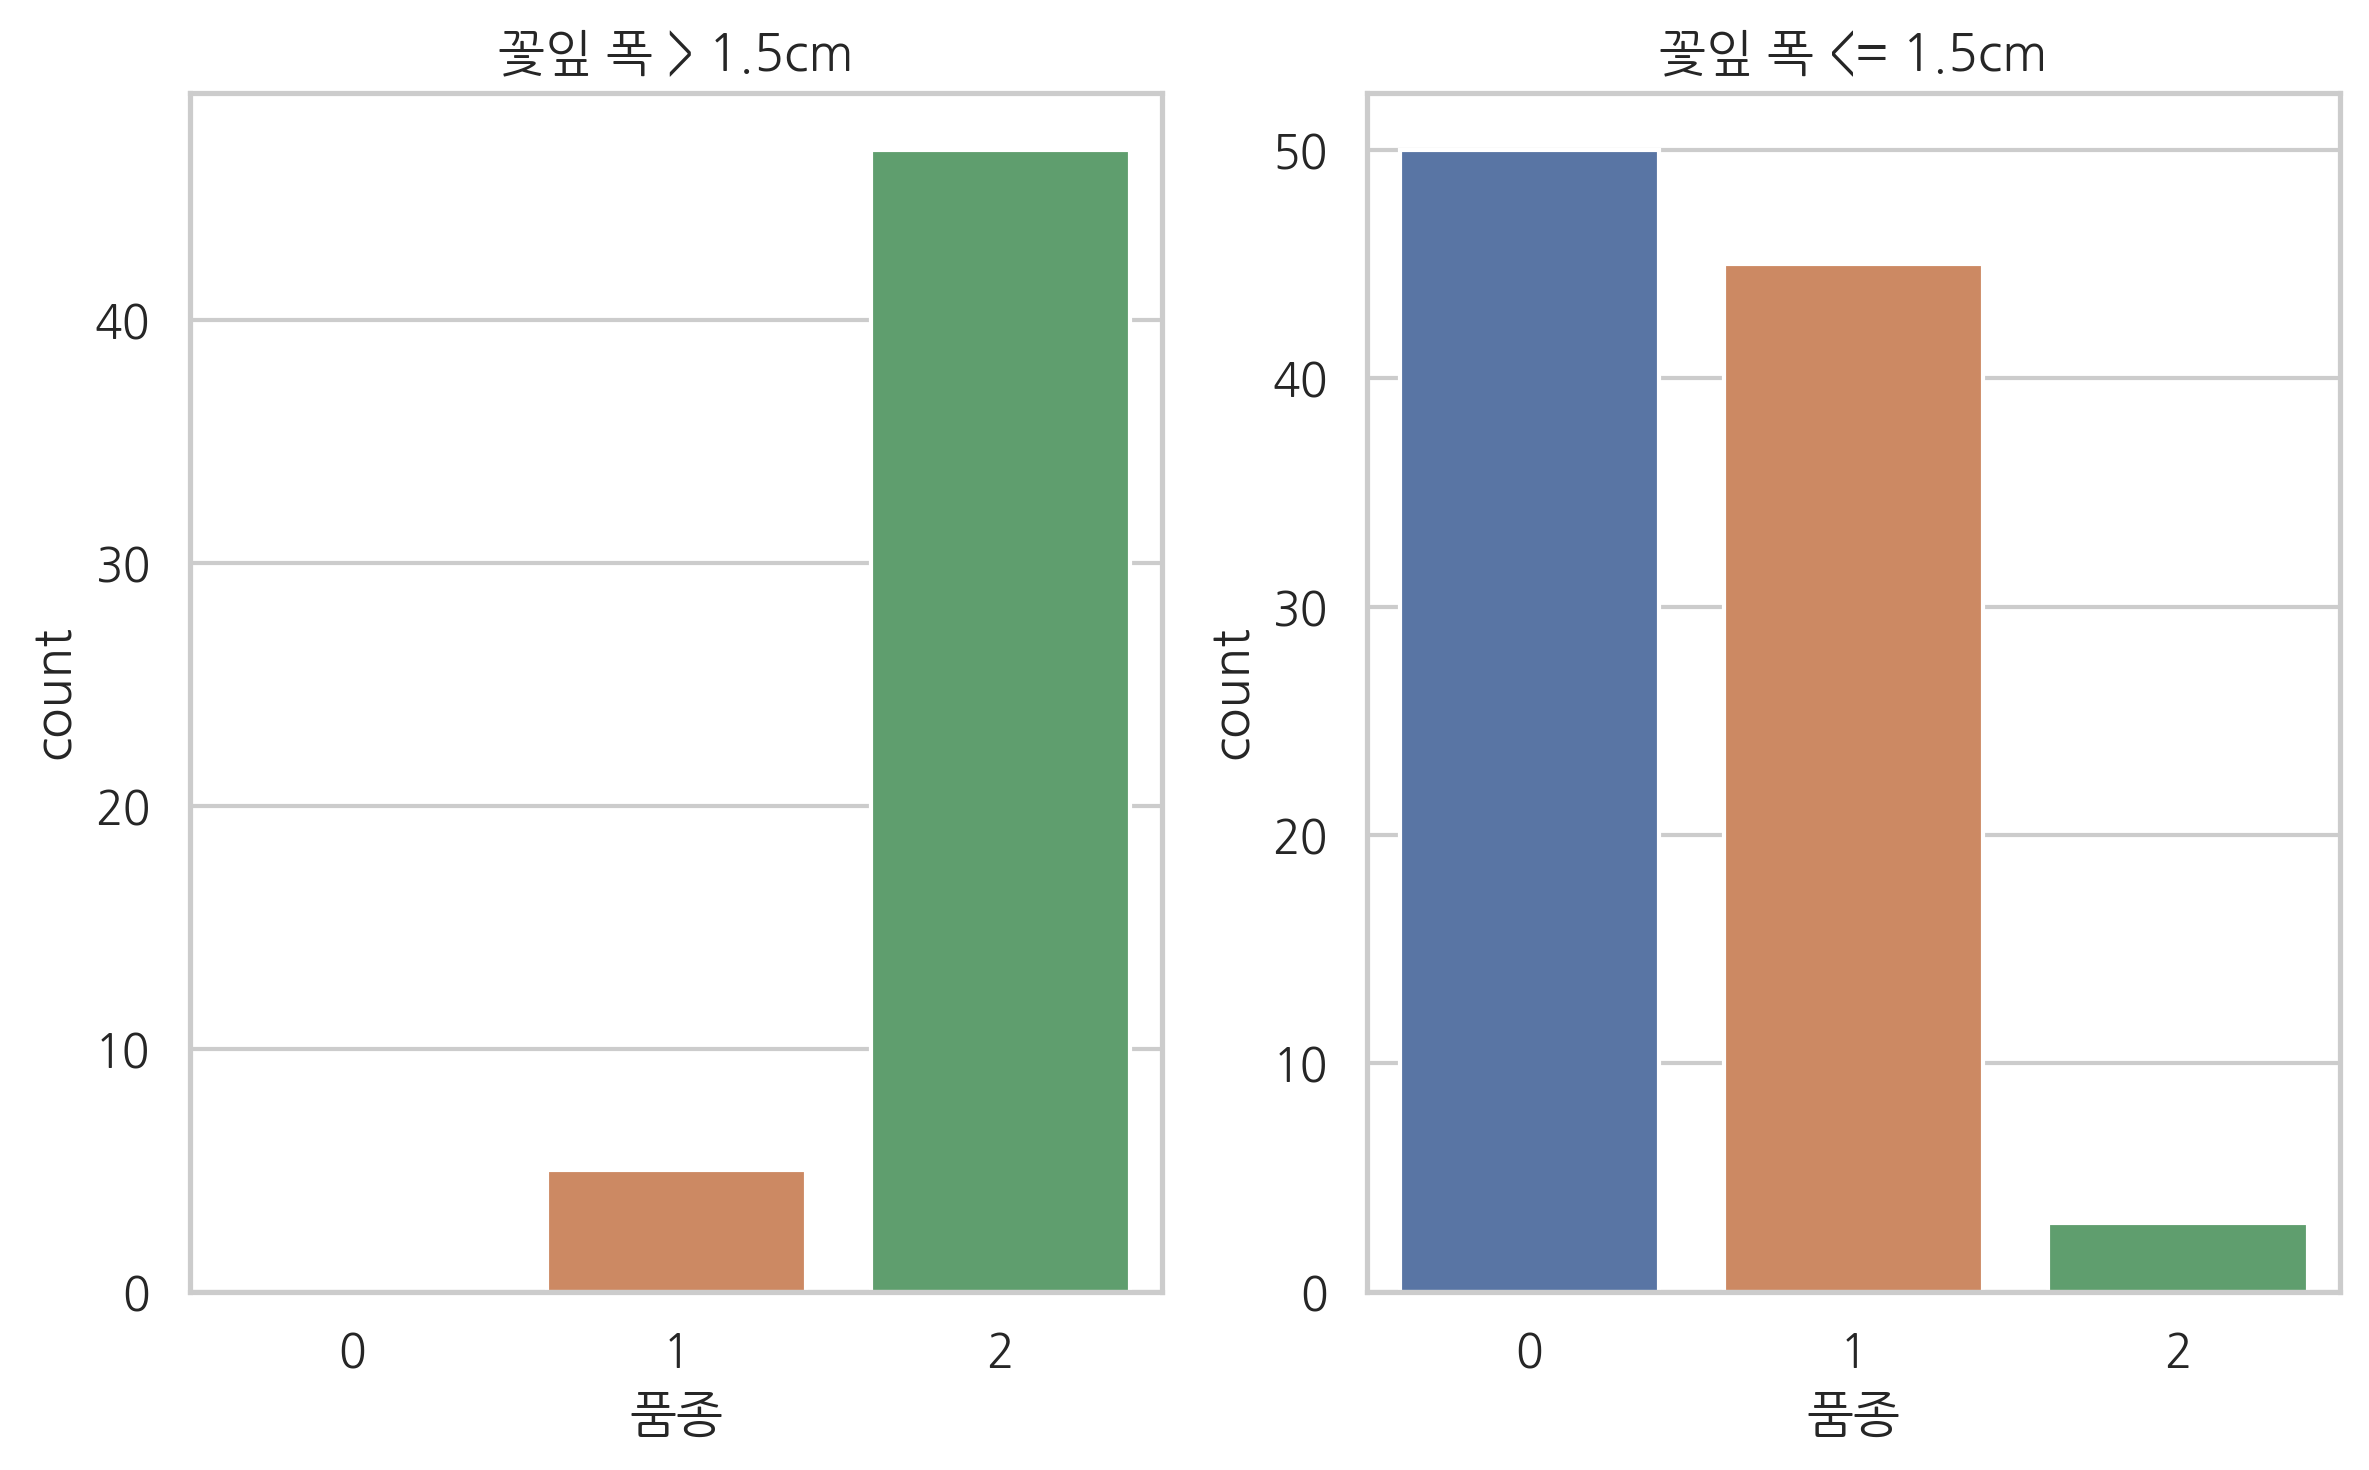

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["품종"] = pd.Series(iris.target, dtype="category")

df1 = df[df["petal width (cm)"] > 1.5]
df2 = df[df["petal width (cm)"] <= 1.5]

fig, ax = plt.subplots(1, 2)
sns.countplot(x="품종", data=df1, ax=ax[0]).set_title("꽃잎 폭 > 1.5cm")
sns.countplot(x="품종", data=df2, ax=ax[1]).set_title("꽃잎 폭 <= 1.5cm")
plt.tight_layout()
plt.show()

In [8]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

np.random.seed(0)
X = rv.rvs(100)
X[:10]

array([[ 3,  4,  3,  3,  8,  9],
       [ 3,  3,  5,  6,  6,  7],
       [ 4,  3,  3,  5,  5, 10],
       [ 1,  0,  5,  5, 12,  7],
       [ 7,  4,  2,  3,  5,  9],
       [ 3,  1,  6,  3,  8,  9],
       [ 2,  4,  3,  3,  5, 13],
       [ 3,  3,  3,  6,  8,  7],
       [ 2,  3,  4,  1, 11,  9],
       [ 4,  2,  1,  2, 10, 11]])

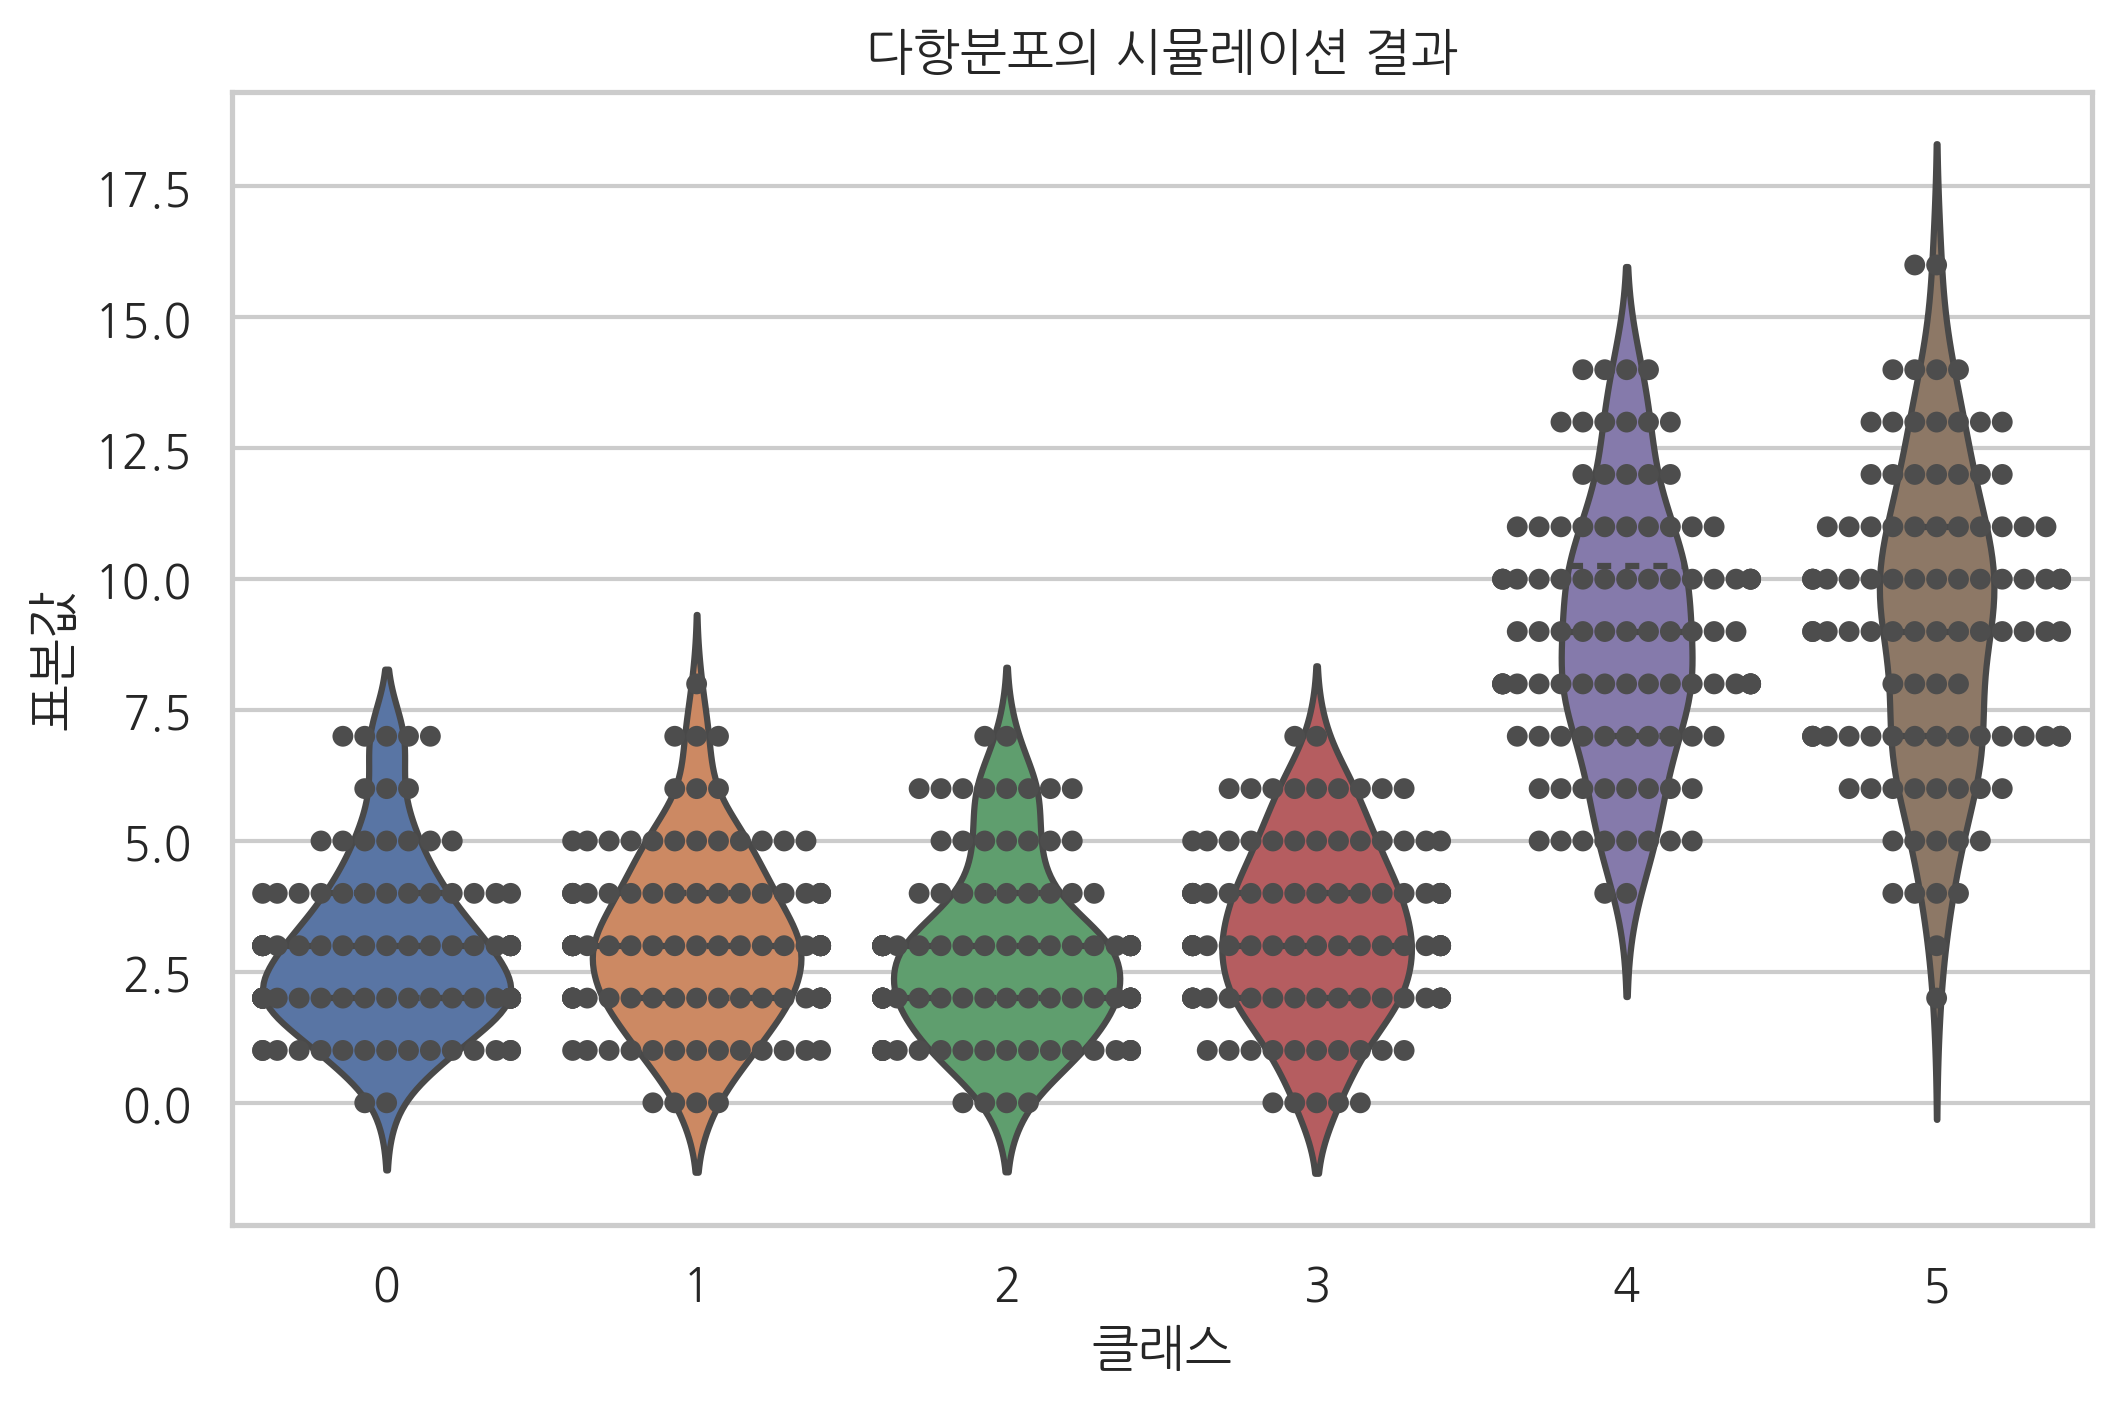

In [9]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["시도", "클래스", "표본값"]

sns.violinplot(x="클래스", y="표본값", data=df, inner="quartile")
sns.swarmplot(x="클래스", y="표본값", data=df, color=".3")
plt.title("다항분포의 시뮬레이션 결과")
plt.show()

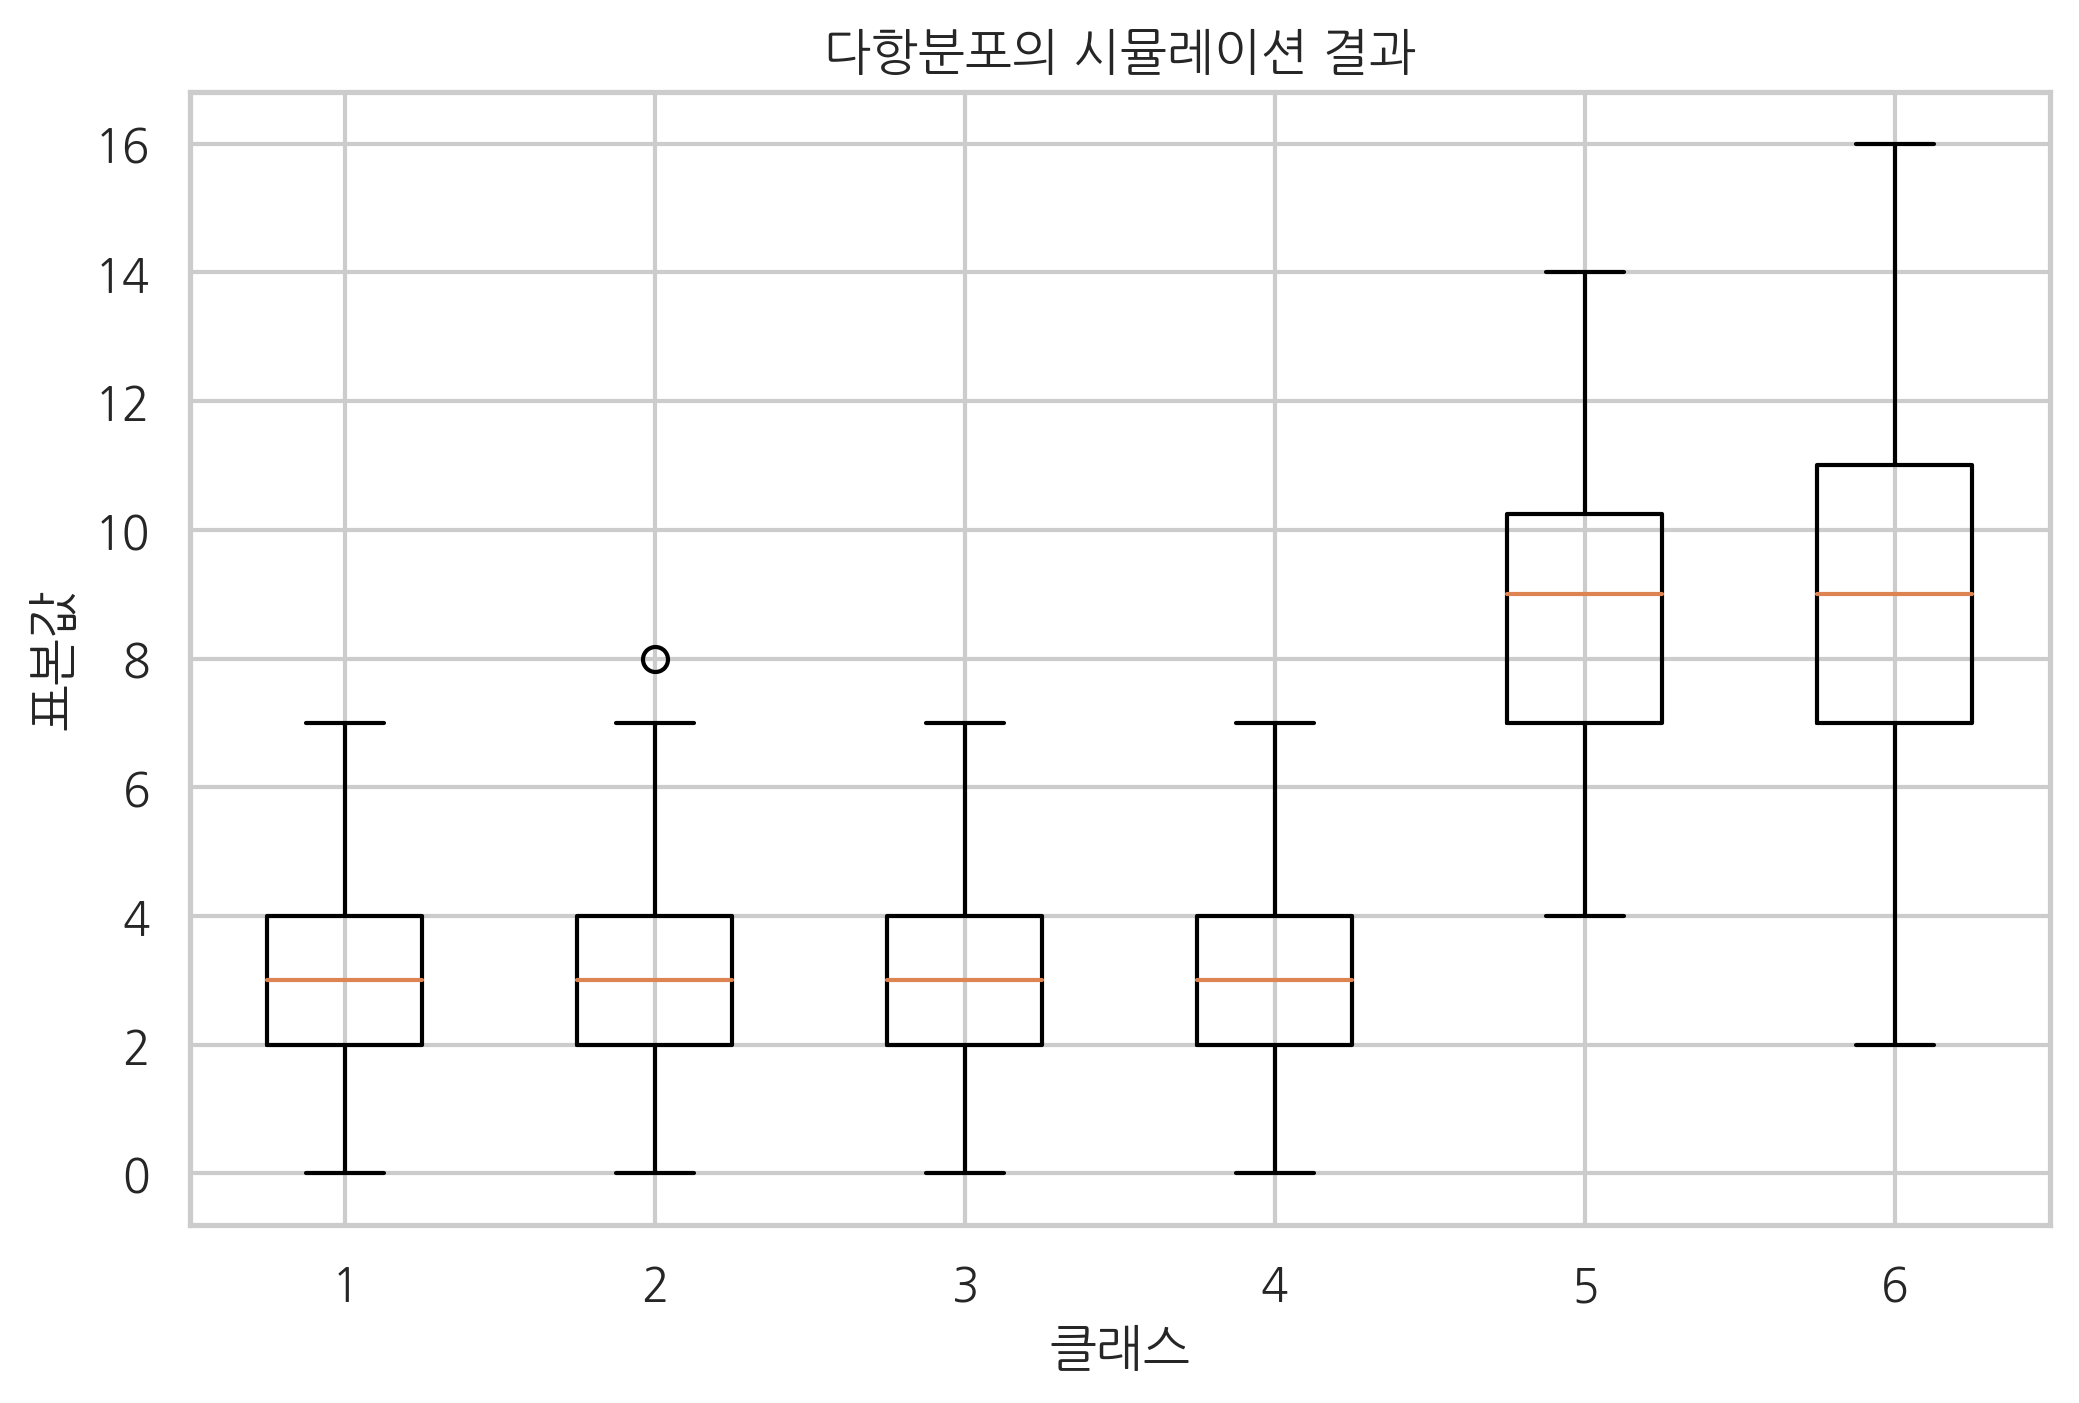

In [10]:
plt.boxplot(X)
plt.title("다항분포의 시뮬레이션 결과")
plt.xlabel("클래스")
plt.ylabel("표본값")
plt.show()

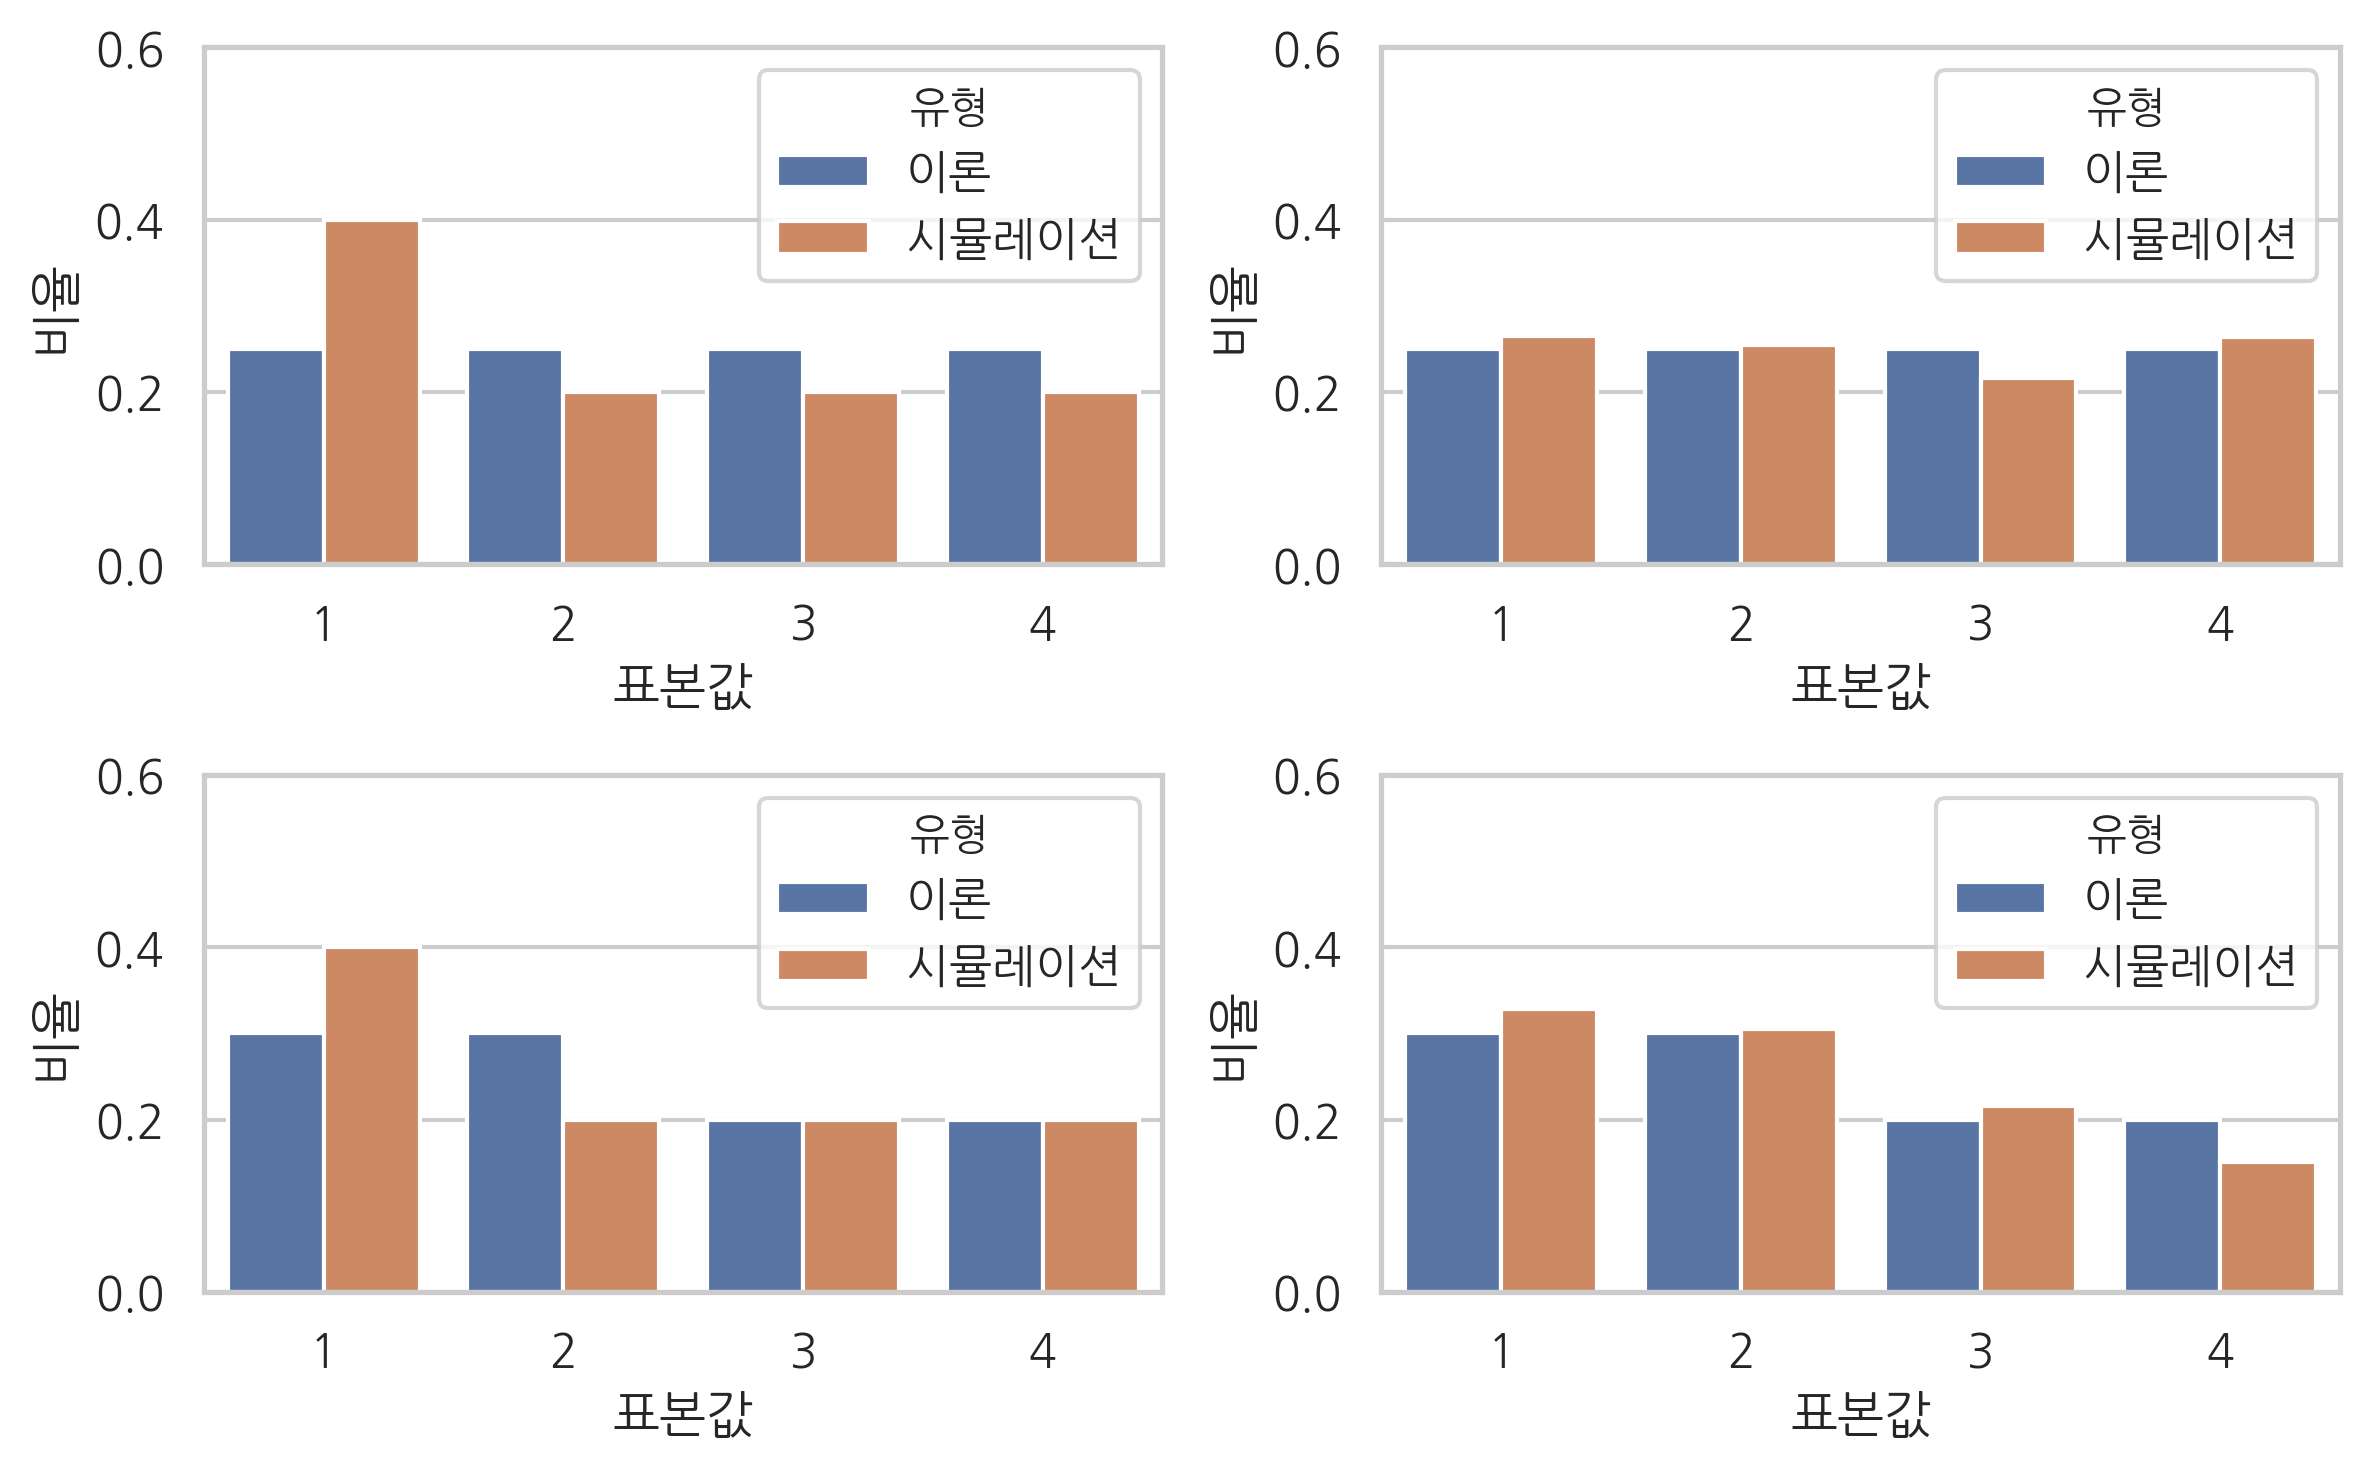

In [11]:
def plot_categorical(mu, N):
    rv = sp.stats.multinomial(1, mu)
    xx = np.arange(1, len(mu) + 1)
    xx_ohe = pd.get_dummies(xx)
    X = rv.rvs(N, random_state=0)
    y = X.sum(axis=0) / float(len(X))
    df = pd.DataFrame({"이론": rv.pmf(xx_ohe.values), "시뮬레이션": y},
                      index=xx).stack()
    df = df.reset_index()
    df.columns = ["표본값", "유형", "비율"]
    df.pivot("표본값", "유형", "비율")
    sns.barplot(x='표본값', y='비율', hue='유형', data=df)
    plt.ylim(0, 0.6)

mu1 = [0.25, 0.25, 0.25, 0.25]
N1 = 10

mu2 = [0.3, 0.3, 0.2, 0.2]
N2 = 1000

plt.subplot(221)
plot_categorical(mu1, N1)
plt.subplot(222)
plot_categorical(mu1, N2)
plt.subplot(223)
plot_categorical(mu2, N1)
plt.subplot(224)
plot_categorical(mu2, N2)
plt.tight_layout()
plt.show()